# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [4]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return x**2 * numpy.sin(x)

Ensure your function works with numpy arrays:

In [5]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [6]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return (2*x*numpy.sin(x)+(2-x**2)*numpy.cos(x) -2)

Check your solution with the same numpy array:

In [7]:
assert g(0) == 0.

In [8]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [9]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return (2*xmax*numpy.sin(xmax)+(2-xmax**2)*numpy.cos(xmax) - (2*xmin*numpy.sin(xmin)+(2-xmin**2)*numpy.cos(xmin)))

Check your analytic function:

In [10]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [11]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    dx = (xmax-xmin)/(N)

    m = numpy.linspace(xmin+dx/2,xmax-dx/2,N)

    x = numpy.linspace(xmin,xmax,N+1)
    y = f(x)
    my = f(m)
    S = dx/6 * numpy.sum(2*numpy.sum(y[1:-1:1]) + y[0]+y[-1]+ 4*numpy.sum(my))
    
    return S

Make sure you have implemented Simpson's rule correctly:

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [13]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Log-Log graph showing fractional error of the midpoint \n Simpson method as a function of the number of panels used')

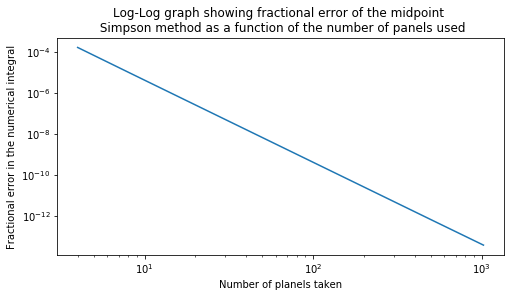

In [24]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over

panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
 
#Loop to caclulate fractional error in numeric solution for each panel number used
for i in range(0, 8):    
    frac_error[i] = (-integrate_numeric(x0, x1, panel_counts[i])+result_analytic)/result_analytic

#Plotting
plt.figure(figsize=(8, 4))
plt.loglog(panel_counts,frac_error)
plt.xlabel("Number of planels taken")
plt.ylabel("Fractional error in the numerical integral")
plt.title("Log-Log graph showing fractional error of the midpoint \n Simpson method as a function of the number of panels used")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing number of pannels increases the accuracy of the numerical method. As number of planels becomes too large, the error stops decreasing and begins fluctuating in error. In this example it begins at about $10^{3}$ panels. If number of panels increases even more, the error increases quickly. In this case this occurs past about $10^5$ panels. This is because of intrinsic numerical round off issues, caused by the computer not being able to store small enough values, accurately enough. It can store a maximum of 16 digits for a number, therefore for the small numbers generated by using such a high number of panels, these small losses in information lead to large errors. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If we were to plot the trapezium rule on the same graph as above we would get a line with gradient a lot shallower than that from the Simpson approach. this is because error scales with panel number in the trapezium method as $N^{-2}$, whereas the simpson method scales as $N^{-4}$. Therefore panel count affects accuracy less in the trapezium method.